In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def given_function(x):
    return x[0]**2+2*x[1]**2

# Plotting the function

Text(0.5, 0.92, 'Plot of $f(x_1,x_2)=x_1^2 + 2x_2^2$')

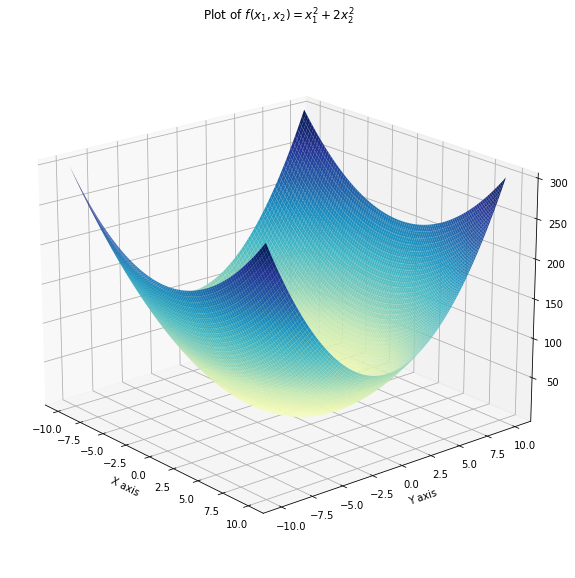

In [3]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
xf=np.linspace(-10,10,100)
yf=np.linspace(-10,10,100)
X,Y=np.meshgrid(xf,yf)
Z=given_function((X,Y))
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='YlGnBu',edgecolor='none')
plt.xlabel("X axis")
plt.ylabel("Y axis")
ax.view_init(20,-40)
plt.title(r'Plot of $f(x_1,x_2)=x_1^2 + 2x_2^2$')

#                      It is a convex function

#

In [4]:
def first_derivative(x):
    return np.array([2*x[0],4*x[1]])

In [5]:
def perturbed_gd_constantlr(function,gradient, start_pt, lr, iter_no,tolerance):
    '''
    :::parameters:::
    function: the function 
    gradient: first order derivative of the function
    start_pt: starting point 
    lr: learning rate
    iter_no: maximum number of iterations that we can allow
    tolerance: measure of closeness between two points
    (when two points are two close then we will break out of the loop)
    '''
    x = start_pt
    i=0
    l=[x]
    while i<=iter_no:
        frnewx = -lr * (gradient(x)+np.random.uniform(0,.5,[2]))
        b=x
        x=x+frnewx
        l.append(x)
        if np.linalg.norm(np.subtract(x,b))<=tolerance:
            break
        if function(x) > function(b):
            lr=lr/2
        i+=1
    return x,l

In [6]:
ptctlr,lisclr=perturbed_gd_constantlr(given_function,first_derivative,np.array([4,4]),0.1,1000,1e-4)

In [7]:
print(ptctlr)
print(len(lisclr))

[-0.03192472 -0.05614153]
26


# Plotting the points obtained on each iteration of perturbed GD

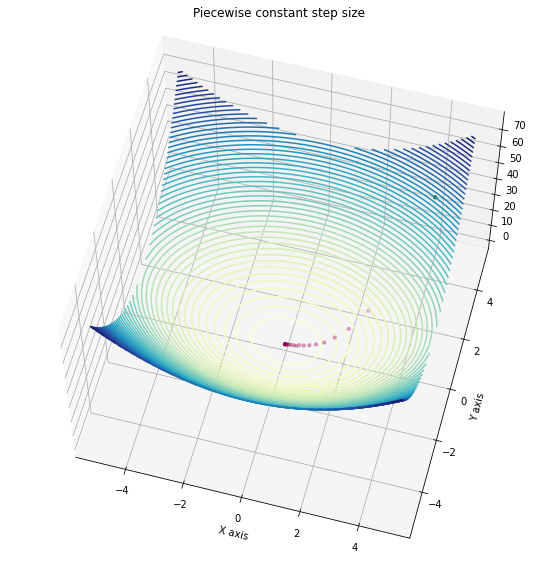

In [8]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
xf=np.linspace(-5,5,1000)
yf=np.linspace(-5,5,1000)
X,Y=np.meshgrid(xf,yf)
Z=given_function((X,Y))
ax.contour3D(X,Y,Z,60,cmap='YlGnBu')
plt.xlabel("X axis")
plt.ylabel("Y axis")
ax.view_init(60,-75)
plt.title("Piecewise constant step size")
ax.scatter3D([lisclr[i][0] for i in range(len(lisclr))],
            [lisclr[i][1] for i in range(len(lisclr))],
            [given_function(lisclr[i]) for i in range(len(lisclr))],
            c=[given_function(lisclr[i]) for i in range(len(lisclr))],cmap="PiYG",s=10)

Text(0.5, 1.0, 'Visualization of decreasing points in the contour plot of function')

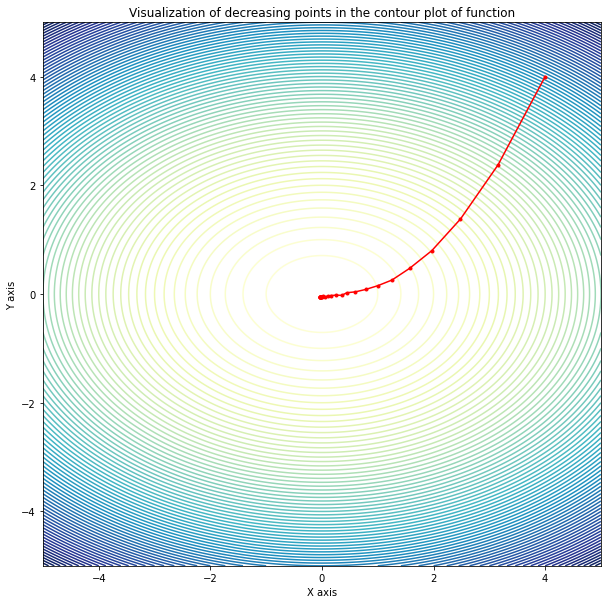

In [9]:
plt.figure(figsize=(10,10))
xf=np.linspace(-5,5,1000)
yf=np.linspace(-5,5,1000)
X,Y=np.meshgrid(xf,yf)
Z=given_function((X,Y))
plt.contour(X,Y,Z,80,cmap='YlGnBu')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot([lisclr[i][0] for i in range(len(lisclr))],[lisclr[i][1] for i in range(len(lisclr))],"r.-")
plt.title("Visualization of decreasing points in the contour plot of function")

In [10]:
def perturbed_gd_exponlr(function,gradient, start_pt, iter_no,tolerance):
    '''
    :::parameters:::
    function: the function 
    gradient: first order derivative of the function
    start_pt: starting point 
    iter_no: maximum number of iterations that we can allow
    tolerance: measure of closeness between two points
    (when two points are two close then we will break out of the loop)
    '''
    x = start_pt
    i=0
    l=[x]
    while i<=iter_no:
        lr1=0.1*np.exp(-0.1*i)
        frnewx = -lr1 * (gradient(x)+np.random.uniform(0,.5,[2]))
        b=x
        x=x+frnewx
        l.append(x)
        if np.linalg.norm(np.subtract(x,b))<=tolerance:
            break
        i+=1
    return x,l

In [11]:
ptxplr,lisxplr=perturbed_gd_exponlr(given_function,first_derivative,np.array([4,4]),1000,1e-4)

In [12]:
print(ptxplr)
print(len(lisxplr))

[ 0.31756499 -0.03544491]
68


# Plotting the points obtained on each iteration of perturbed GD with Exponential Decay in Learning Rate

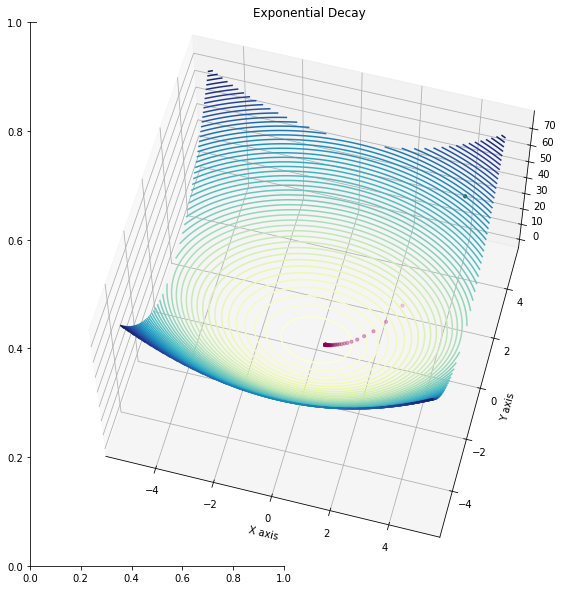

In [13]:
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
ax = plt.axes(projection='3d')
xf=np.linspace(-5,5,1000)
yf=np.linspace(-5,5,1000)
X,Y=np.meshgrid(xf,yf)
Z=given_function((X,Y))
ax.contour3D(X,Y,Z,60,cmap='YlGnBu')
plt.xlabel("X axis")
plt.ylabel("Y axis")
ax.view_init(60,-75)
plt.title('Exponential Decay')
ax.scatter3D([lisxplr[i][0] for i in range(len(lisxplr))],
            [lisxplr[i][1] for i in range(len(lisxplr))],
            [given_function(lisxplr[i]) for i in range(len(lisxplr))],
            c=[given_function(lisxplr[i]) for i in range(len(lisxplr))],cmap="PiYG",s=10)

Text(0.5, 1.0, 'Visualization of decreasing points in the contour plot of function')

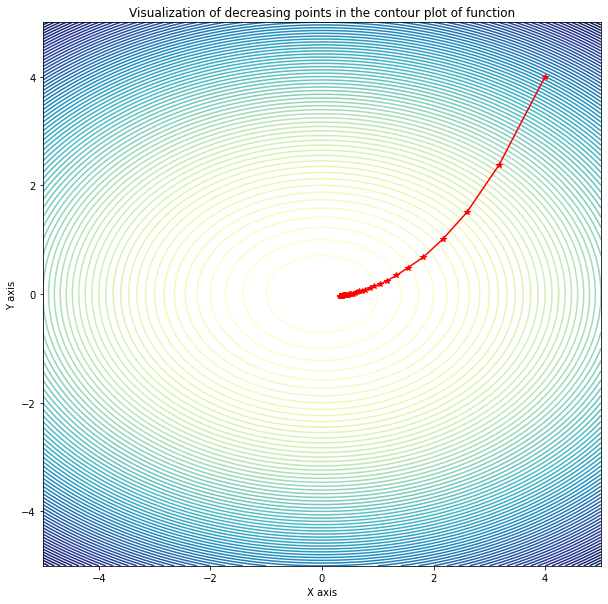

In [14]:
plt.figure(figsize=(10,10))
xf=np.linspace(-5,5,1000)
yf=np.linspace(-5,5,1000)
X,Y=np.meshgrid(xf,yf)
Z=given_function((X,Y))
plt.contour(X,Y,Z,80,cmap='YlGnBu')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot([lisxplr[i][0] for i in range(len(lisxplr))],
            [lisxplr[i][1] for i in range(len(lisxplr))],"r*-")
plt.title("Visualization of decreasing points in the contour plot of function")

# Plotting the points obtained on each iteration of perturbed GD with Polynomial Decay in Learning Rate

In [15]:
def perturbed_gd_polylr(function,gradient, start_pt, iter_no,tolerance):
    '''
    :::parameters:::
    function: the function 
    gradient: first order derivative of the function
    start_pt: starting point 
    iter_no: maximum number of iterations that we can allow
    tolerance: measure of closeness between two points
    (when two points are two close then we will break out of the loop)
    '''
    x = start_pt
    i=0
    l=[x]
    beta=0.5
    while i<=iter_no:
        lr1=0.1*(1+beta*i)**(-0.5)
        frnewx = -lr1 * (gradient(x)+np.random.uniform(0,.5,[2]))
        b=x
        x=x+frnewx
        l.append(x)
        if np.linalg.norm(np.subtract(x,b))<=tolerance:
            break
        i+=1
    return x,l

In [16]:
ptpollr,lispollr=perturbed_gd_polylr(given_function,first_derivative,np.array([4,4]),1000,1e-4)

In [17]:
print(ptpollr)
print(len(lispollr))

[-0.11356473 -0.06783904]
192


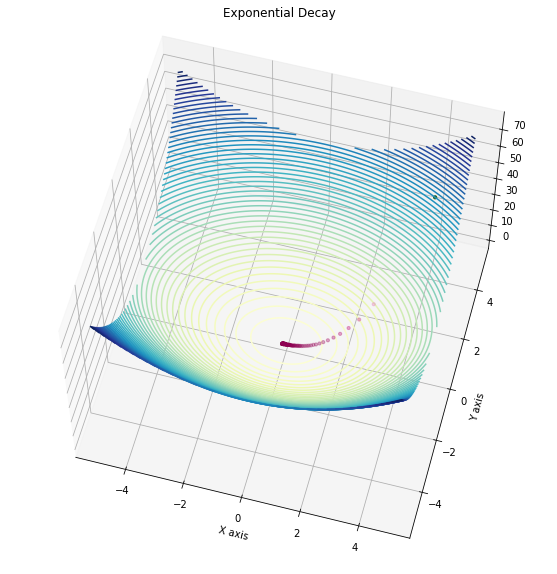

In [18]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
xf=np.linspace(-5,5,1000)
yf=np.linspace(-5,5,1000)
X,Y=np.meshgrid(xf,yf)
Z=given_function((X,Y))
ax.contour3D(X,Y,Z,60,cmap='YlGnBu')
plt.xlabel("X axis")
plt.ylabel("Y axis")
ax.view_init(60,-75)
plt.title('Exponential Decay')
ax.scatter3D([lispollr[i][0] for i in range(len(lispollr))],
            [lispollr[i][1] for i in range(len(lispollr))],
            [given_function(lispollr[i]) for i in range(len(lispollr))],
            c=[given_function(lispollr[i]) for i in range(len(lispollr))],cmap="PiYG",s=10)

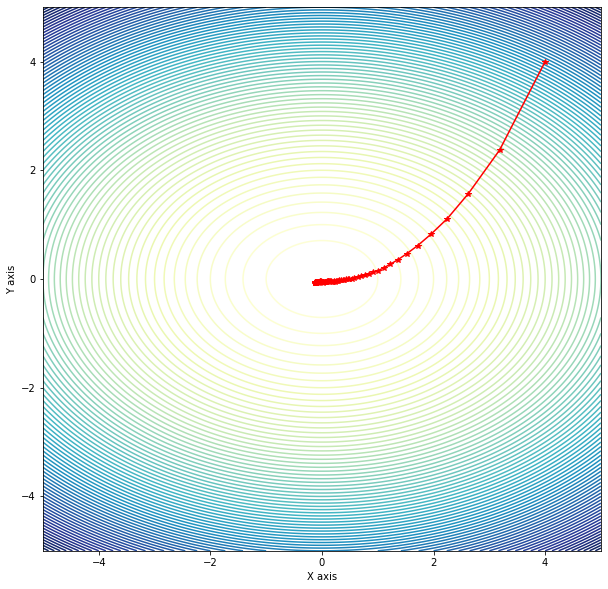

In [19]:
plt.figure(figsize=(10,10))
xf=np.linspace(-5,5,1000)
yf=np.linspace(-5,5,1000)
X,Y=np.meshgrid(xf,yf)
Z=given_function((X,Y))
plt.contour(X,Y,Z,80,cmap='YlGnBu')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot([lispollr[i][0] for i in range(len(lispollr))],
            [lispollr[i][1] for i in range(len(lispollr))],"r*-")

# Convergence rate and number of steps comparison

In [20]:
def convergence_rate(lis):
    '''
    list will be given as an input and there will be two outputs.. these are ->
    number of iterations
    list
    '''
    l=[]
    no_iter=len(lis)
    for i in range(1,len(lis)-1):
        a=(given_function(lis[i+1])-0)/(given_function(lis[i])-0)
        l.append(a)
    return no_iter,l

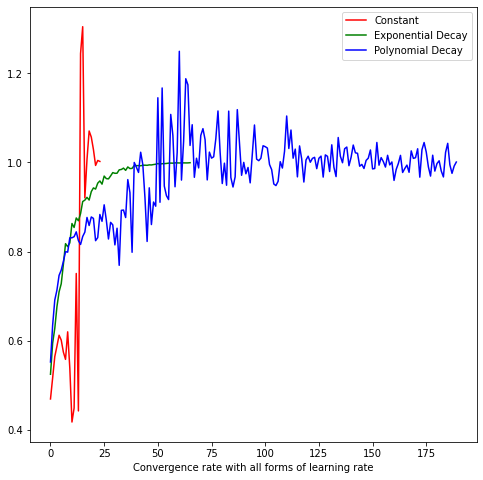

In [21]:
plt.figure(figsize=(8,8))
plt.plot(convergence_rate(lisclr)[1],"r",label="Constant")
plt.plot(convergence_rate(lisxplr)[1],"g",label="Exponential Decay")
plt.plot(convergence_rate(lispollr)[1],"b",label="Polynomial Decay")
plt.xlabel("Convergence rate with all forms of learning rate")
plt.legend()

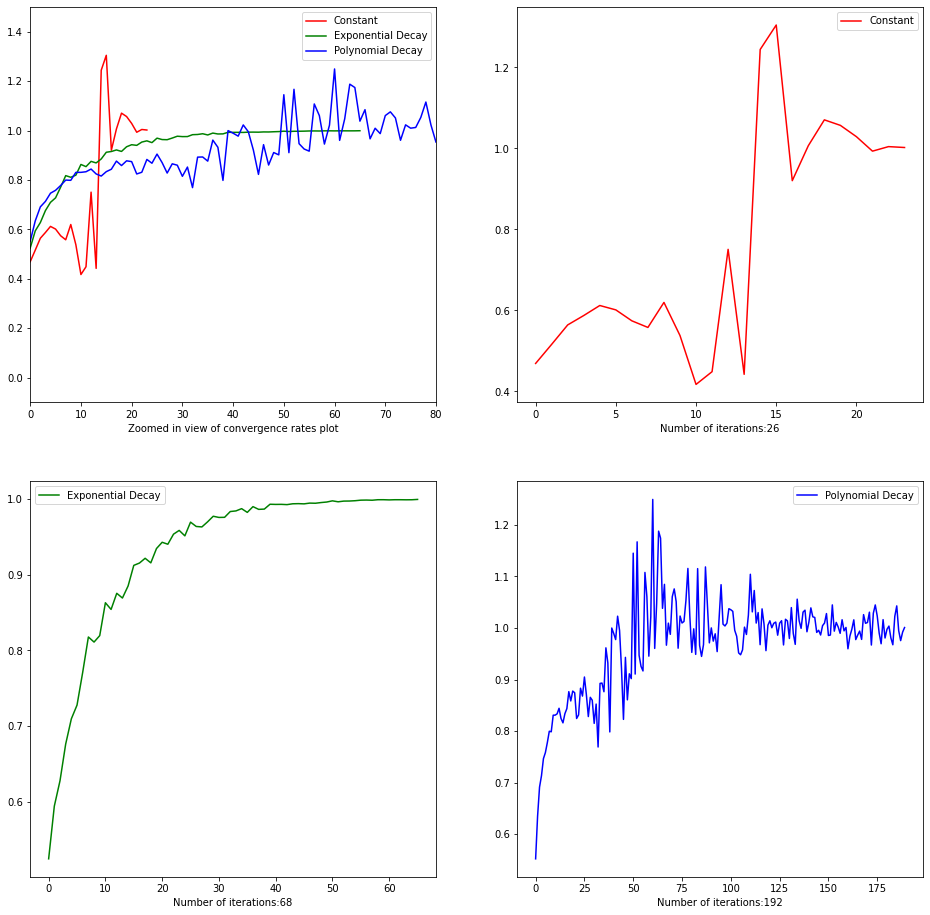

In [22]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.plot(convergence_rate(lisclr)[1],"r",label="Constant")
plt.plot(convergence_rate(lisxplr)[1],"g",label="Exponential Decay")
plt.plot(convergence_rate(lispollr)[1],"b",label="Polynomial Decay")
plt.xlim((0,80))
plt.ylim((-0.1,1.5))
plt.xlabel("Zoomed in view of convergence rates plot")
plt.legend()
plt.subplot(222)
plt.plot(convergence_rate(lisclr)[1],"r",label="Constant")
plt.xlabel("Number of iterations:{}".format(convergence_rate(lisclr)[0]))
plt.legend()
plt.subplot(223)
plt.plot(convergence_rate(lisxplr)[1],"g",label="Exponential Decay")
plt.xlabel("Number of iterations:{}".format(convergence_rate(lisxplr)[0]))
plt.legend()
plt.subplot(224)
plt.plot(convergence_rate(lispollr)[1],"b",label="Polynomial Decay")
plt.xlabel("Number of iterations:{}".format(convergence_rate(lispollr)[0]))
plt.legend()

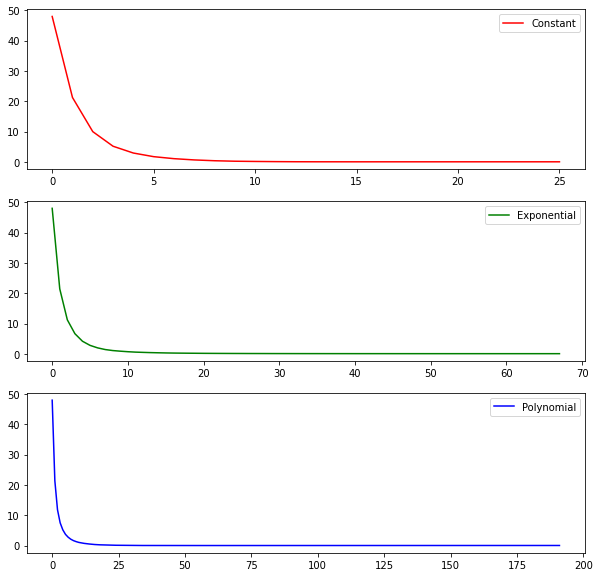

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot([given_function((a,b)) for a,b in lisclr],'r',label="Constant")
plt.legend()
plt.subplot(312)
plt.plot([given_function((a,b)) for a,b in lisxplr],'g',label="Exponential")
plt.legend()
plt.subplot(313)
plt.plot([given_function((a,b)) for a,b in lispollr],'b',label="Polynomial")
plt.legend()

Text(0.5, 1.0, 'Accuracy with constant and Exponential learning rate')

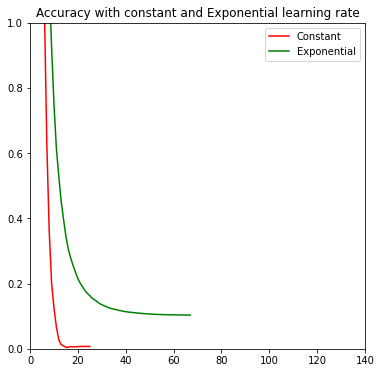

In [24]:
plt.figure(figsize=(6,6))
plt.plot([given_function((a,b)) for a,b in lisclr],'r',label="Constant")
plt.plot([given_function((a,b)) for a,b in lisxplr],'g',label="Exponential")
plt.legend()
plt.xlim(0,140)
plt.ylim(0,1)
plt.title("Accuracy with constant and Exponential learning rate")

Text(0.5, 1.0, 'Accuracy with Exponential and Polynomial learning rate')

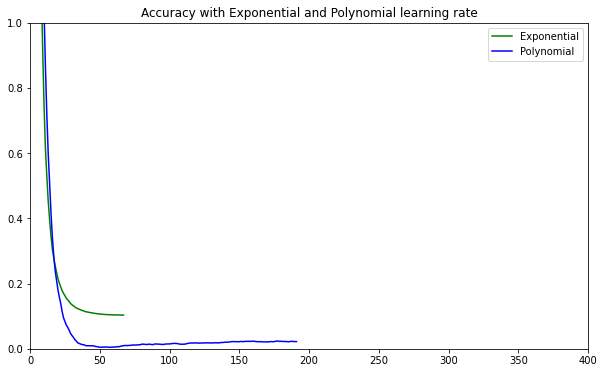

In [25]:
plt.figure(figsize=(10,6))
plt.plot([given_function((a,b)) for a,b in lisxplr],'g',label="Exponential")
plt.plot([given_function((a,b)) for a,b in lispollr],'b',label="Polynomial")
plt.legend()
plt.xlim(0,400)
plt.ylim(0,1)
plt.title("Accuracy with Exponential and Polynomial learning rate")

Text(0.5, 1.0, 'Accuracy with constant and Polynomial learning rate')

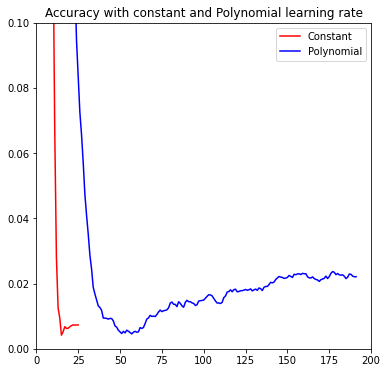

In [26]:
plt.figure(figsize=(6,6))
plt.plot([given_function((a,b)) for a,b in lisclr],'r',label="Constant")
plt.plot([given_function((a,b)) for a,b in lispollr],'b',label="Polynomial")
plt.legend()
plt.xlim(0,200)
plt.ylim(0,.1)
plt.title("Accuracy with constant and Polynomial learning rate")

# In search of finding optimal beta which have minimum number of iterations

In [27]:
def opt_beta_perturbed_gd_polylr(function,gradient,beta, start_pt, iter_no,tolerance):
    '''
    :::parameters:::
    function: the function 
    gradient: first order derivative of the function
    beta: beta value
    start_pt: starting point 
    iter_no: maximum number of iterations that we can allow
    tolerance: measure of closeness between two points
    (when two points are two close then we will break out of the loop)
    '''
    x = start_pt
    i=0
    l=[x]
    while i<=iter_no:
        lr1=0.1*(1+beta*i)**-.5
        frnewx = -lr1 * (gradient(x)+np.random.uniform(0,.5,[2]))
        b=x
        x=x+frnewx
        l.append(x)
        if np.linalg.norm(np.subtract(x,b))<=tolerance:
            break
        i+=1
    return x,l

In [28]:
def opt_beta(n=100):
    i=1
    l=[]
    while i<n:
        c=len(opt_beta_perturbed_gd_polylr(given_function,first_derivative,float(i/n),np.array([4,4]),10000,1e-4)[1])
        print("Beta={} and No. of iterations is:{}".format(float(i/n),c))
        l.append(c)
        i+=1
        b=np.where(np.array(l)==np.min(np.array(l)))
    plt.plot(l)
    return np.ceil((b[0]+1))/n

Beta=0.01 and No. of iterations is:2366
Beta=0.02 and No. of iterations is:5165
Beta=0.03 and No. of iterations is:211
Beta=0.04 and No. of iterations is:1692
Beta=0.05 and No. of iterations is:1080
Beta=0.06 and No. of iterations is:2871
Beta=0.07 and No. of iterations is:229
Beta=0.08 and No. of iterations is:1827
Beta=0.09 and No. of iterations is:1058
Beta=0.1 and No. of iterations is:1015
Beta=0.11 and No. of iterations is:343
Beta=0.12 and No. of iterations is:1699
Beta=0.13 and No. of iterations is:636
Beta=0.14 and No. of iterations is:1976
Beta=0.15 and No. of iterations is:413
Beta=0.16 and No. of iterations is:755
Beta=0.17 and No. of iterations is:753
Beta=0.18 and No. of iterations is:818
Beta=0.19 and No. of iterations is:929
Beta=0.2 and No. of iterations is:369
Beta=0.21 and No. of iterations is:817
Beta=0.22 and No. of iterations is:328
Beta=0.23 and No. of iterations is:640
Beta=0.24 and No. of iterations is:1290
Beta=0.25 and No. of iterations is:493
Beta=0.26 and No

array([0.69])

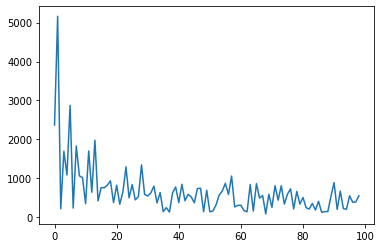

In [32]:
opt_beta()

Beta=0.01 and No. of iterations is:846
Beta=0.02 and No. of iterations is:1612
Beta=0.03 and No. of iterations is:3178
Beta=0.04 and No. of iterations is:1019
Beta=0.05 and No. of iterations is:1330
Beta=0.06 and No. of iterations is:1520
Beta=0.07 and No. of iterations is:1674
Beta=0.08 and No. of iterations is:1724
Beta=0.09 and No. of iterations is:1006
Beta=0.1 and No. of iterations is:2032
Beta=0.11 and No. of iterations is:1047
Beta=0.12 and No. of iterations is:896
Beta=0.13 and No. of iterations is:627
Beta=0.14 and No. of iterations is:1251
Beta=0.15 and No. of iterations is:705
Beta=0.16 and No. of iterations is:1412
Beta=0.17 and No. of iterations is:1384
Beta=0.18 and No. of iterations is:749
Beta=0.19 and No. of iterations is:1497
Beta=0.2 and No. of iterations is:1302
Beta=0.21 and No. of iterations is:432
Beta=0.22 and No. of iterations is:369
Beta=0.23 and No. of iterations is:321
Beta=0.24 and No. of iterations is:429
Beta=0.25 and No. of iterations is:813
Beta=0.26 an

array([0.41])

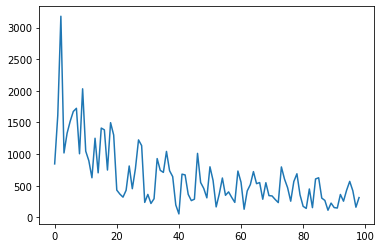

In [34]:
opt_beta()

Beta=0.01 and No. of iterations is:2485
Beta=0.02 and No. of iterations is:3736
Beta=0.03 and No. of iterations is:3994
Beta=0.04 and No. of iterations is:981
Beta=0.05 and No. of iterations is:972
Beta=0.06 and No. of iterations is:2025
Beta=0.07 and No. of iterations is:313
Beta=0.08 and No. of iterations is:1090
Beta=0.09 and No. of iterations is:1427
Beta=0.1 and No. of iterations is:1223
Beta=0.11 and No. of iterations is:1051
Beta=0.12 and No. of iterations is:861
Beta=0.13 and No. of iterations is:620
Beta=0.14 and No. of iterations is:1102
Beta=0.15 and No. of iterations is:493
Beta=0.16 and No. of iterations is:998
Beta=0.17 and No. of iterations is:510
Beta=0.18 and No. of iterations is:656
Beta=0.19 and No. of iterations is:1408
Beta=0.2 and No. of iterations is:1024
Beta=0.21 and No. of iterations is:1553
Beta=0.22 and No. of iterations is:1512
Beta=0.23 and No. of iterations is:327
Beta=0.24 and No. of iterations is:637
Beta=0.25 and No. of iterations is:860
Beta=0.26 and 

array([0.35])

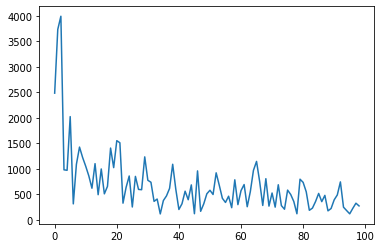

In [36]:
opt_beta()

Beta=0.01 and No. of iterations is:5959
Beta=0.02 and No. of iterations is:2755
Beta=0.03 and No. of iterations is:3978
Beta=0.04 and No. of iterations is:2412
Beta=0.05 and No. of iterations is:3027
Beta=0.06 and No. of iterations is:2117
Beta=0.07 and No. of iterations is:3212
Beta=0.08 and No. of iterations is:1710
Beta=0.09 and No. of iterations is:2107
Beta=0.1 and No. of iterations is:1554
Beta=0.11 and No. of iterations is:1005
Beta=0.12 and No. of iterations is:1012
Beta=0.13 and No. of iterations is:798
Beta=0.14 and No. of iterations is:883
Beta=0.15 and No. of iterations is:1024
Beta=0.16 and No. of iterations is:1620
Beta=0.17 and No. of iterations is:516
Beta=0.18 and No. of iterations is:734
Beta=0.19 and No. of iterations is:156
Beta=0.2 and No. of iterations is:1637
Beta=0.21 and No. of iterations is:1106
Beta=0.22 and No. of iterations is:813
Beta=0.23 and No. of iterations is:955
Beta=0.24 and No. of iterations is:1557
Beta=0.25 and No. of iterations is:851
Beta=0.26 

array([0.67])

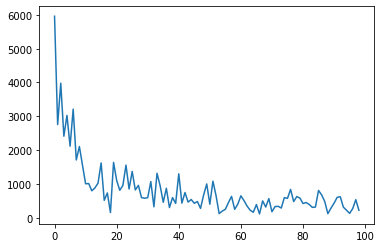

In [37]:
opt_beta()